# ASSIGNMENT DAY 9_Alif Gala *Buana* : DATA CLEANING


### Soal 1
#### Missing Values
Pertanyaan: Identifikasi kolom yang memiliki nilai yang hilang dan hitung persentase data yang hilang di setiap kolom.



In [ ]:
import pandas as pd
import numpy as np
import re

pd.set_option("display.max_columns",None)
df= pd.read_csv("linkdin_Job_data.csv")
df = df.drop(columns=['Column1'])
df

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,3472039871,Back End Developer,"Kochi, Kerala, India",NaN,Orion Innovation,Hybrid,Full-time · Associate,"5,001-10,000 employees · IT Services and IT Co...",25,2 days,24 company alumni,Poornima Viswanathan,NaN,https://www.linkedin.com/in/poornima-viswanath...,About the job The ideal candidate will show in...
7923,3473194471,Software Engineer - Senior,"Gurugram, Haryana, India",NaN,Uplers,On-site,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",18,2 days,3 company alumni,Tejveer Singh,NaN,https://www.linkedin.com/in/tejveer-singh-a348...,About the job Experience: 4 - 8 yearsProfile: ...
7924,3461005032,Vue JS,"Hyderabad, Telangana, India",NaN,Tata Consultancy Services,On-site,Full-time · Mid-Senior level,"10,001+ employees · IT Services and IT Consulting",15,6 days,"10,080 company alumni",ANNIE ANTONY,"11,923,634 followers",https://www.linkedin.com/in/annie-antony-a1041...,About the job Role- Vue js DeveloperExperience...
7925,3474305684,iOS Developer,"Bengaluru, Karnataka, India",NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",17,1 day,3 company alumni,Arjun Jaggi,NaN,https://www.linkedin.com/in/arjunjaggi7,About the job Profile: iOS DeveloperExperience...


In [ ]:
df.dtypes

,0
job_ID,int64
job,object
location,object
company_id,float64
company_name,object
work_type,object
full_time_remote,object
no_of_employ,object
no_of_application,object
posted_day_ago,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7927 non-null   int64  
 1   job                 7894 non-null   object 
 2   location            7894 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        7892 non-null   object 
 5   work_type           7736 non-null   object 
 6   full_time_remote    7848 non-null   object 
 7   no_of_employ        7603 non-null   object 
 8   no_of_application   7887 non-null   object 
 9   posted_day_ago      7920 non-null   object 
 10  alumni              4858 non-null   object 
 11  Hiring_person       5720 non-null   object 
 12  linkedin_followers  4814 non-null   object 
 13  hiring_person_link  5720 non-null   object 
 14  job_details         7881 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 929.1

In [ ]:
# persentase data yang hilang setiap kolom
df.isna().sum()/len(df)*100

,0
job_ID,0.000000
job,0.416299
location,0.416299
company_id,100.000000
company_name,0.441529
work_type,2.409487
full_time_remote,0.996594
no_of_employ,4.087297
no_of_application,0.504605
posted_day_ago,0.088306


### Soal 3
#### Data Type Correction
Pertanyaan: Kolom `no_of_employ` memiliki data numerik yang disimpan sebagai string. Ubah kolom ini menjadi tipe integer dan tangani nilai non-numerik dengan tepat.


In [ ]:
df["no_of_employ"].unique()

array(['1,001-5,000 employees · IT Services and IT Consulting',
       '1-10 employees', '10,001+ employees · Telecommunications',
       '51-200 employees', '201-500 employees', nan, '11-50 employees',
       '501-1,000 employees · Renewable Energy Semiconductor Manufacturing',
       '501-1,000 employees · Market Research', '1,001-5,000 employees',
       '5,001-10,000 employees · IT Services and IT Consulting',
       '10,001+ employees · IT Services and IT Consulting',
       '51-200 employees · IT Services and IT Consulting',
       '51-200 employees · Technology, Information and Internet',
       '501-1,000 employees',
       '1,001-5,000 employees · Pharmaceutical Manufacturing',
       '10,001+ employees · Information Technology & Services',
       '11-50 employees · Human Resources Services',
       '1-10 employees · Staffing and Recruiting',
       '11-50 employees · IT Services and IT Consulting',
       '501-1,000 employees · Business Consulting and Services',
       '201-5

In [ ]:
df[['Employees', 'Industry']] = df['no_of_employ'].str.split(' · ', expand=True)

df['Employees'] = df['Employees'].astype(str).str.replace(' employees', '', regex=False)

# Pisahkan informasi minimal dan maksimal karyawan
def extract_employee_range(employee_str):
    if pd.isna(employee_str):
        return pd.Series([None, None])
    if '-' in employee_str:
        min_employees, max_employees = employee_str.split('-')
        min_employees = min_employees.replace(',', '')
        max_employees = max_employees.replace(',', '')
        return pd.Series([min_employees, max_employees])
    elif '+' in employee_str:
        min_employees = employee_str.replace(',', '').replace('+', '')
        return pd.Series([min_employees, None])
    else:
        min_employees = employee_str.replace(',', '')
        return pd.Series([min_employees, min_employees])

df[['Min_Employees', 'Max_Employees']] = df['Employees'].apply(extract_employee_range)

# Hapus kolom 'Employees' jika sudah tidak diperlukan
df = df.drop(columns=['Employees'])
df= df.drop(columns=['Industry'])

df


,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Min_Employees,Max_Employees
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,1001,5000
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,1001,5000
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,1001,5000
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,1,10
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,3472039871,Back End Developer,"Kochi, Kerala, India",NaN,Orion Innovation,Hybrid,Full-time · Associate,"5,001-10,000 employees · IT Services and IT Co...",25,2 days,24 company alumni,Poornima Viswanathan,NaN,https://www.linkedin.com/in/poornima-viswanath...,About the job The ideal candidate will show in...,5001,10000
7923,3473194471,Software Engineer - Senior,"Gurugram, Haryana, India",NaN,Uplers,On-site,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",18,2 days,3 company alumni,Tejveer Singh,NaN,https://www.linkedin.com/in/tejveer-singh-a348...,About the job Experience: 4 - 8 yearsProfile: ...,1001,5000
7924,3461005032,Vue JS,"Hyderabad, Telangana, India",NaN,Tata Consultancy Services,On-site,Full-time · Mid-Senior level,"10,001+ employees · IT Services and IT Consulting",15,6 days,"10,080 company alumni",ANNIE ANTONY,"11,923,634 followers",https://www.linkedin.com/in/annie-antony-a1041...,About the job Role- Vue js DeveloperExperience...,10001,None
7925,3474305684,iOS Developer,"Bengaluru, Karnataka, India",NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",17,1 day,3 company alumni,Arjun Jaggi,NaN,https://www.linkedin.com/in/arjunjaggi7,About the job Profile: iOS DeveloperExperience...,1001,5000


In [ ]:
df['Min_Employees'].unique()

array(['1001', '1', '10001', '51', '201', 'nan', '11', '501', '5001'],
      dtype=object)

### Soal 3
#### Duplicate Data Detection and Removal
Pertanyaan: Deteksi dan hapus posting pekerjaan yang duplikat berdasarkan `job_ID` Pastikan dataset yang dihasilkan hanya berisi posting pekerjaan yang unik.


In [ ]:
df["job_ID"].duplicated().sum()

2084

In [ ]:
df[df["job_ID"].duplicated()]

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Min_Employees,Max_Employees
283,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,12 company alumni,NaN,"5,396,069 followers",NaN,About the job Crossover is the world's #1 sour...,1001,5000
284,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",hours,9 hours,12 company alumni,NaN,"5,396,064 followers",NaN,About the job Crossover is the world's #1 sour...,1001,5000
285,3473336242,Shopify Developer,"Gurugram, Haryana, India",NaN,ADesignGuy,Hybrid,Internship,11-50 employees,minute,1 minute,NaN,Vashisth Bhushan,"2,164 followers",https://www.linkedin.com/in/vashisth00,About the job Job Title: Shopify Developer (In...,11,50
298,3472808738,Shopify Developer,"Delhi, India",NaN,Digital Impressions,On-site,NaN,NaN,hours,8 hours,NaN,NaN,NaN,NaN,About the job The ideal candidate will be resp...,nan,nan
300,3470730035,Data Engineer (Python),"Gurugram, Haryana, India",NaN,Mobile Programming LLC,On-site,Full-time,"1,001-5,000 employees",46,21 hours,5 company alumni,Ajay Tanwar,"269,378 followers",https://www.linkedin.com/in/ajay-tanwar-8081b3251,About the job Data Engineer (Python) Experienc...,1001,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7913,3464523737,Informatica Developer,"Kochi, Kerala, India",NaN,Tata Consultancy Services,On-site,Full-time,"10,001+ employees · IT Services and IT Consulting",31,3 days,"10,080 company alumni",Angel Mathews,"11,923,625 followers",https://www.linkedin.com/in/angel-mathews-3256...,About the job Greetings from TATA Consultancy ...,10001,None
7914,3471321322,Business Support/Partner Alliance Coordinator,"Navi Mumbai, Maharashtra, India",NaN,cloudxchange.io,On-site,Full-time · Associate,51-200 employees · IT Services and IT Consulting,21,3 days,1 company alumni,Annette Roberts,NaN,https://www.linkedin.com/in/annette-roberts,About the job Cloudxchange.io is India’s Leadi...,51,200
7915,3468025847,Xceptor Developer,"Chennai, Tamil Nadu, India",NaN,Virtusa,Hybrid,Full-time · Mid-Senior level,"10,001+ employees · IT Services and IT Consulting",9,3 days,412 company alumni,Nandha Ramadass,"782,441 followers",https://www.linkedin.com/in/nandha-ramadass-43...,About the job 4+ Years of Experience in Xcepto...,10001,None
7920,3466165399,LTE Developer,"Hyderabad, Telangana, India",NaN,Tata Consultancy Services,Hybrid,Full-time,"10,001+ employees · IT Services and IT Consulting",45,1 day,"10,080 company alumni",Madhuri Mahajan,"11,923,632 followers",https://www.linkedin.com/in/madhuri-mahajan-b0...,"About the job Dear Candidate, Greetings from T...",10001,None


### SOAL 4
####Standarisasi Data
Pertanyaan: Standarisasi kolom `location` dengan memastikan semua nama kota ditulis dengan huruf besar dan konsisten (misalnya, "New York", "San Francisco").


In [ ]:
df = df.drop_duplicates(subset='job_ID', keep="first")

In [ ]:
df["job_ID"].duplicated().sum()


0

In [ ]:
df

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Min_Employees,Max_Employees
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,1001,5000
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,1001,5000
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,1001,5000
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,1,10
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,3472039871,Back End Developer,"Kochi, Kerala, India",NaN,Orion Innovation,Hybrid,Full-time · Associate,"5,001-10,000 employees · IT Services and IT Co...",25,2 days,24 company alumni,Poornima Viswanathan,NaN,https://www.linkedin.com/in/poornima-viswanath...,About the job The ideal candidate will show in...,5001,10000
7923,3473194471,Software Engineer - Senior,"Gurugram, Haryana, India",NaN,Uplers,On-site,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",18,2 days,3 company alumni,Tejveer Singh,NaN,https://www.linkedin.com/in/tejveer-singh-a348...,About the job Experience: 4 - 8 yearsProfile: ...,1001,5000
7924,3461005032,Vue JS,"Hyderabad, Telangana, India",NaN,Tata Consultancy Services,On-site,Full-time · Mid-Senior level,"10,001+ employees · IT Services and IT Consulting",15,6 days,"10,080 company alumni",ANNIE ANTONY,"11,923,634 followers",https://www.linkedin.com/in/annie-antony-a1041...,About the job Role- Vue js DeveloperExperience...,10001,None
7925,3474305684,iOS Developer,"Bengaluru, Karnataka, India",NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",17,1 day,3 company alumni,Arjun Jaggi,NaN,https://www.linkedin.com/in/arjunjaggi7,About the job Profile: iOS DeveloperExperience...,1001,5000


In [ ]:
df['location'].unique()

array(['Delhi, Delhi, India', 'New Delhi, Delhi, India',
       'Greater Bengaluru Area', 'Gurugram, Haryana, India',
       'Mohali district, Punjab, India', 'Bengaluru, Karnataka, India',
       'Delhi, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Telangana, India', 'India',
       'Chennai, Tamil Nadu, India', 'Kolkata, West Bengal, India',
       'Madurai, Tamil Nadu, India', 'Pune, Maharashtra, India',
       'Mumbai, Maharashtra, India', 'Kochi, Kerala, India',
       'Visakhapatnam, Andhra Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Vadodara, Gujarat, India',
       'Hosur, Tamil Nadu, India', 'Coimbatore, Tamil Nadu, India',
       'Chengannur, Kerala, India', 'Mumbai Metropolitan Region',
       'Bhopal, Madhya Pradesh, India', 'Maharashtra, India',
       'Surat, Gujarat, India', 'Ludhiana, Punjab, India',
       'Jaipur, Rajasthan, India', 'Chandigarh, Chandigarh, India',
       'Trivandrum, Kerala, India', 'Delhi Cantonment, Delhi, India',
       'Tha

In [ ]:
def split_location(loc):
    if pd.isna(loc):
        return pd.Series([np.nan, np.nan, np.nan], index=['city', 'province', 'country'])
    parts = loc.rsplit(', ', 2)
    if len(parts) == 3:
        return pd.Series(parts, index=['city', 'province', 'country'])
    elif len(parts) == 2:
        return pd.Series([np.nan] + parts, index=['city', 'province', 'country'])
    else:
        return pd.Series([np.nan, np.nan, parts[0]], index=['city', 'province', 'country'])

# Apply function to split location
df[['city', 'province', 'country']] = df['location'].apply(split_location)

df

<ipython-input-41-c66d98c95323>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['city', 'province', 'country']] = df['location'].apply(split_location)
<ipython-input-41-c66d98c95323>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['city', 'province', 'country']] = df['location'].apply(split_location)
<ipython-input-41-c66d98c95323>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Min_Employees,Max_Employees,city,province,country
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,1001,5000,Delhi,Delhi,India
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,1001,5000,New Delhi,Delhi,India
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,1001,5000,NaN,NaN,Greater Bengaluru Area
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,1,10,Gurugram,Haryana,India
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,1,10,Mohali district,Punjab,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,3472039871,Back End Developer,"Kochi, Kerala, India",NaN,Orion Innovation,Hybrid,Full-time · Associate,"5,001-10,000 employees · IT Services and IT Co...",25,2 days,24 company alumni,Poornima Viswanathan,NaN,https://www.linkedin.com/in/poornima-viswanath...,About the job The ideal candidate will show in...,5001,10000,Kochi,Kerala,India
7923,3473194471,Software Engineer - Senior,"Gurugram, Haryana, India",NaN,Uplers,On-site,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",18,2 days,3 company alumni,Tejveer Singh,NaN,https://www.linkedin.com/in/tejveer-singh-a348...,About the job Experience: 4 - 8 yearsProfile: ...,1001,5000,Gurugram,Haryana,India
7924,3461005032,Vue JS,"Hyderabad, Telangana, India",NaN,Tata Consultancy Services,On-site,Full-time · Mid-Senior level,"10,001+ employees · IT Services and IT Consulting",15,6 days,"10,080 company alumni",ANNIE ANTONY,"11,923,634 followers",https://www.linkedin.com/in/annie-antony-a1041...,About the job Role- Vue js DeveloperExperience...,10001,None,Hyderabad,Telangana,India
7925,3474305684,iOS Developer,"Bengaluru, Karnataka, India",NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",17,1 day,3 company alumni,Arjun Jaggi,NaN,https://www.linkedin.com/in/arjunjaggi7,About the job Profile: iOS DeveloperExperience...,1001,5000,Bengaluru,Karnataka,India


In [ ]:
df['city'].unique()

array(['Delhi', 'New Delhi', nan, 'Gurugram', 'Mohali district',
       'Bengaluru', 'Noida', 'Hyderabad', 'Chennai', 'Kolkata', 'Madurai',
       'Pune', 'Mumbai', 'Kochi', 'Visakhapatnam', 'Ahmedabad',
       'Vadodara', 'Hosur', 'Coimbatore', 'Chengannur', 'Bhopal', 'Surat',
       'Ludhiana', 'Jaipur', 'Chandigarh', 'Trivandrum',
       'Delhi Cantonment', 'Thane', 'Navi Mumbai', 'Bangalore Urban',
       'Gurgaon', 'Nagpur', 'Kalyan', 'Dehradun', 'Kozhikode', 'Tenkasi',
       'Amritsar', 'Patna', 'Vijayawada', 'Borivali', 'Udipi',
       'Thiruvananthapuram', 'Sahibzada Ajit Singh Nagar', 'Indore',
       'Lucknow', 'Guindy', 'Vapi', 'Alwar', 'Rajkot', 'Faridabad',
       'Kanpur', 'Bandra', 'Thiruvarur', 'Puducherry', 'Mangaluru',
       'Aurangabad', 'Gurgaon Rural', 'Pimpri Chinchwad',
       'Kolkata metropolitan area', 'Gandhinagar', 'Ambala', 'Ghaziabad',
       'Hoshiarpur', 'Manesar', 'Bhubaneshwar', 'South Delhi', 'Saket',
       'Karunagappally', 'Rohini', 'Dumka', 'Sri

### SOAL 5
#### Deteksi dan Analisis Outlier
Pertanyaan: Identifikasi outlier pada kolom `no_of_application`. Definisikan outlier menggunakan metode IQR (Interquartile Range) dan berikan analisis singkat tentang temuan tersebut.



In [ ]:
  df['no_of_application'].unique()


array(['200', '184', '8', '2', '7', 'minutes', '22', '111', '36', '44',
       '29', '4', '19', '14', '13', '32', '20', 'hours', '5', '21', '27',
       '85', '97', '42', '3', '1', '130', '127', '11', '16', '60', '17',
       '52', '50', '10', '61', '95', '39', '18', '6', '40', '138', '9',
       '26', '78', '47', '104', '15', '110', '25', '38', '122', '34',
       '149', '83', '57', '66', '56', '80', '135', '158', '139', '54',
       '28', '23', '12', '175', '35', '87', '109', '71', '70', '24', '96',
       '48', '103', '31', 'days', '68', '147', 'day', '65', nan, '59',
       '102', '53', '125', '143', '142', '150', '195', '160', '99', '112',
       '67', '74', '134', '43', '98', '146', '55', '115', '108', '176',
       '113', '30', '76', '72', '129', '100', '172', 'hour', '51',
       'seconds', '79', '69', '46', '132', '114', '136', '117', '106',
       '173', '73', '174', '145', '84', '190', '77', '81', '33', '166',
       '164', '163', '94', '128', '161', '194', '152', '159', '13

In [ ]:
df['no_of_application'] = pd.to_numeric(df['no_of_application'], errors='coerce')

<ipython-input-44-a2753be89107>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_application'] = pd.to_numeric(df['no_of_application'], errors='coerce')


In [ ]:
df = df.dropna(subset=['no_of_application'])

# Mengatur tipe data menjadi integer jika perlu
df['no_of_application'] = df['no_of_application'].astype(int)
df

<ipython-input-45-53c06c8e3ea6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_application'] = df['no_of_application'].astype(int)


,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Min_Employees,Max_Employees,city,province,country
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,1001,5000,Delhi,Delhi,India
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,1001,5000,New Delhi,Delhi,India
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,1001,5000,NaN,NaN,Greater Bengaluru Area
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,1,10,Gurugram,Haryana,India
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,1,10,Mohali district,Punjab,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,3472039871,Back End Developer,"Kochi, Kerala, India",NaN,Orion Innovation,Hybrid,Full-time · Associate,"5,001-10,000 employees · IT Services and IT Co...",25,2 days,24 company alumni,Poornima Viswanathan,NaN,https://www.linkedin.com/in/poornima-viswanath...,About the job The ideal candidate will show in...,5001,10000,Kochi,Kerala,India
7923,3473194471,Software Engineer - Senior,"Gurugram, Haryana, India",NaN,Uplers,On-site,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",18,2 days,3 company alumni,Tejveer Singh,NaN,https://www.linkedin.com/in/tejveer-singh-a348...,About the job Experience: 4 - 8 yearsProfile: ...,1001,5000,Gurugram,Haryana,India
7924,3461005032,Vue JS,"Hyderabad, Telangana, India",NaN,Tata Consultancy Services,On-site,Full-time · Mid-Senior level,"10,001+ employees · IT Services and IT Consulting",15,6 days,"10,080 company alumni",ANNIE ANTONY,"11,923,634 followers",https://www.linkedin.com/in/annie-antony-a1041...,About the job Role- Vue js DeveloperExperience...,10001,None,Hyderabad,Telangana,India
7925,3474305684,iOS Developer,"Bengaluru, Karnataka, India",NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",17,1 day,3 company alumni,Arjun Jaggi,NaN,https://www.linkedin.com/in/arjunjaggi7,About the job Profile: iOS DeveloperExperience...,1001,5000,Bengaluru,Karnataka,India


In [ ]:
Q1 = df['no_of_application'].quantile(0.25)
Q3 = df['no_of_application'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = df[(df['no_of_application'] < lower_bound) | (df['no_of_application'] > upper_bound)]
outliers

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Min_Employees,Max_Employees,city,province,country
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,1001,5000,Delhi,Delhi,India
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,1001,5000,NaN,NaN,Greater Bengaluru Area
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,1,10,Gurugram,Haryana,India
5,3472504479,Data Analyst,"Gurugram, Haryana, India",NaN,airtel,On-site,Full-time · Entry level,"10,001+ employees · Telecommunications",200,10 hours,132 company alumni,NaN,"972,657 followers",NaN,About the job The ideal candidate will use the...,10001,None,Gurugram,Haryana,India
6,3471658510,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Bengaluru, Karnataka, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,546 followers",NaN,About the job Crossover is the world's #1 sour...,1001,5000,Bengaluru,Karnataka,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,3473086956,Core PHP Developer,"Bangalore Urban, Karnataka, India",NaN,Capgemini,Hybrid,Full-time · Mid-Senior level,"10,001+ employees · IT Services and IT Consulting",200,2 days,"7,402 company alumni",Sujit Singh,NaN,https://www.linkedin.com/in/sujitsing,About the job CORE PHP DEVELOPERS 3 - 5 years ...,10001,None,Bangalore Urban,Karnataka,India
7893,3473097995,Bigdata Developer,"Bangalore Urban, Karnataka, India",NaN,IQVIA India,On-site,Full-time · Associate,"10,001+ employees · Hospitals and Health Care",200,2 days,50 company alumni,NaN,"129,703 followers",NaN,About the job Skill Set: Bigdata Developer Job...,10001,None,Bangalore Urban,Karnataka,India
7895,3465629284,Test Analyst,"Mumbai, Maharashtra, India",NaN,NielsenIQ,Hybrid,Full-time · Associate,"10,001+ employees · Information Services",200,6 days,105 company alumni,NaN,NaN,NaN,"About the job Job Description Test Analyst, Mu...",10001,None,Mumbai,Maharashtra,India
7904,3464530484,iOS Developer,"Bengaluru, Karnataka, India",NaN,Booking.com,On-site,Full-time · Mid-Senior level,"10,001+ employees · Software Development",200,3 days,126 company alumni,Muskan Gupta,"819,304 followers",https://www.linkedin.com/in/muskan-gupta-aa741...,About the job Job Description - iOS Software E...,10001,None,Bengaluru,Karnataka,India


In [ ]:
lower_bound

-102.0

In [ ]:
non_outliers = df[(df['no_of_application'] >= lower_bound) & (df['no_of_application'] <= upper_bound)]
non_outliers.describe()


,job_ID,company_id,no_of_application
count,2.211000e+03,0.0,2211.000000
mean,3.465924e+09,NaN,33.193125
std,7.989674e+07,NaN,41.511458
min,1.419216e+08,NaN,1.000000
25%,3.467360e+09,NaN,5.000000
50%,3.470568e+09,NaN,16.000000
75%,3.474303e+09,NaN,44.000000
max,3.477823e+09,NaN,186.000000


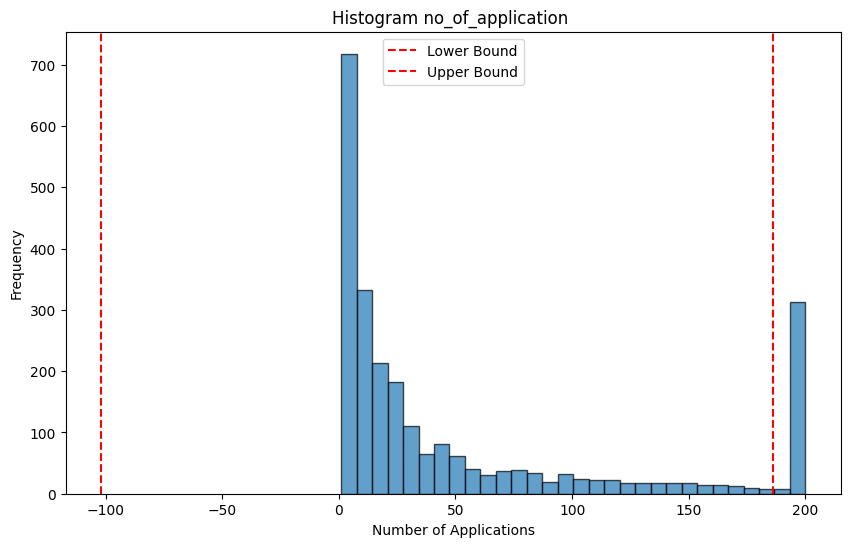

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['no_of_application'], bins=30, edgecolor='k', alpha=0.7)
plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.title('Histogram no_of_application ')
plt.xlabel('Number of Applications')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Analisis sederhana




Garis batas atas berada di dibawah nilai 200, 200 menandakan titik tertinggi dari data. Ada beberapa data yang mencapai titik ini, yang bisa jadi merupakan outlier atau nilai ekstrem dalam dataset.



Mayoritas data terkumpul di sekitar angka 0 hingga 50 aplikasi. Namun, terdapat beberapa nilai yang jauh lebih tinggi yang tersebar hingga mendekati angka 200, yang berpotensi dianggap sebagai outlier, terutama jika jumlah aplikasi secara umum berkonsentrasi di angka yang lebih rendah.